In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import plotnine as pn
import pingouin as pg
import numpy as np

In [2]:
data = pd.read_csv('survey.csv', sep=";")
data.columns

Index(['id', 'submitdate', 'lastpage', 'startlanguage', 'seed', 'read',
       'completion', 'orderunderstood', 'execunderstood', 'orderfollowed',
       'lost', 'resultunderstood', 'kernelrestart', 'hasmoon',
       'colorunderstood', 'moonorder', 'moonwayback', 'moonspeed',
       'moonopinion', 'moonactions', 'moonactionmore', 'moonfree'],
      dtype='object')

In [3]:
group_with_moon = data[data['hasmoon'] == "Oui"]
len(group_with_moon)


16

In [4]:
group_without_moon = data[data['hasmoon'] == "Non"]
len(group_without_moon)

19

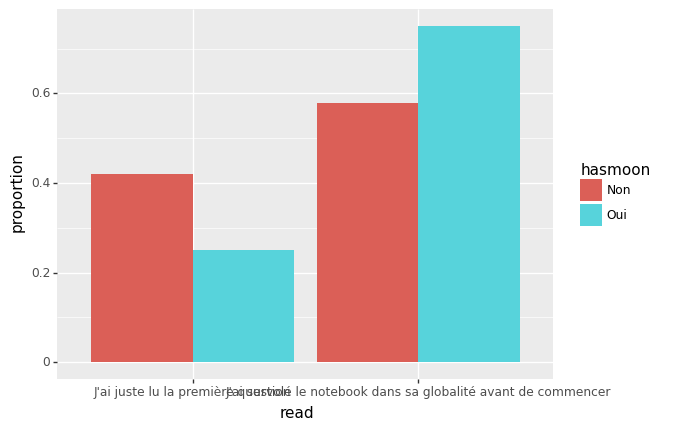

<ggplot: (323881057)>

In [5]:
data['read'] = pd.Categorical(data['read'], categories=["J'ai juste lu la première question", "J'ai survolé le notebook dans sa globalité avant de commencer"])
data_order = data.groupby('hasmoon', as_index = False)['read'].value_counts(normalize=True)
data_order
p = pn.ggplot(data_order) + pn.geom_bar(pn.aes(x='read', y='proportion', fill='hasmoon'), stat='identity', position='dodge')
p

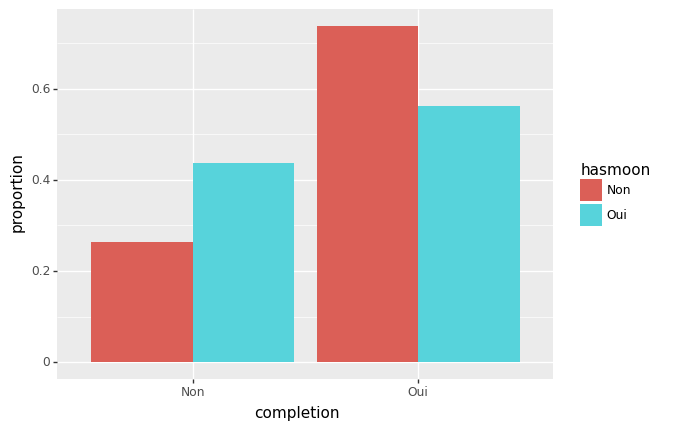

<ggplot: (284784569)>

In [6]:
data['completion'] = pd.Categorical(data['completion'], categories=['Non', 'Oui'])
data_order = data.groupby('hasmoon', as_index = False)['completion'].value_counts(normalize=True)
data_order
p = (pn.ggplot(data_order) + pn.geom_bar(pn.aes(x='completion', y='proportion', fill='hasmoon'), stat='identity', position='dodge') )
p

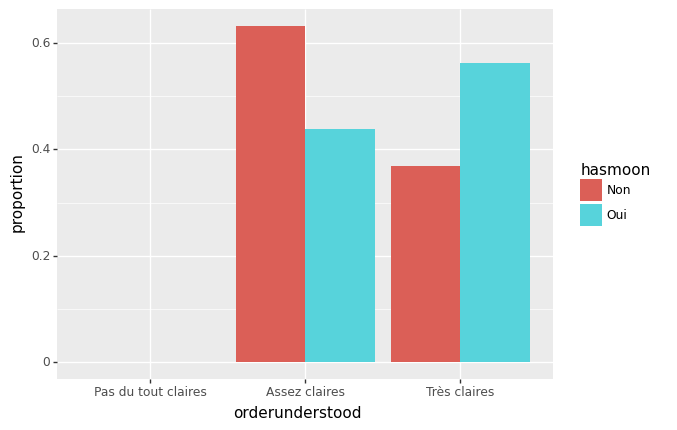

<ggplot: (324302161)>

In [7]:
data['orderunderstood'] = pd.Categorical(data['orderunderstood'] , categories=['Pas du tout claires', 'Assez claires', 'Très claires'])
data_order = data.groupby('hasmoon', as_index = False)['orderunderstood'].value_counts(normalize=True)
p = (pn.ggplot(data_order) + pn.geom_bar(pn.aes(x='orderunderstood', y='proportion', fill='hasmoon'), stat='identity', position='dodge') )
p

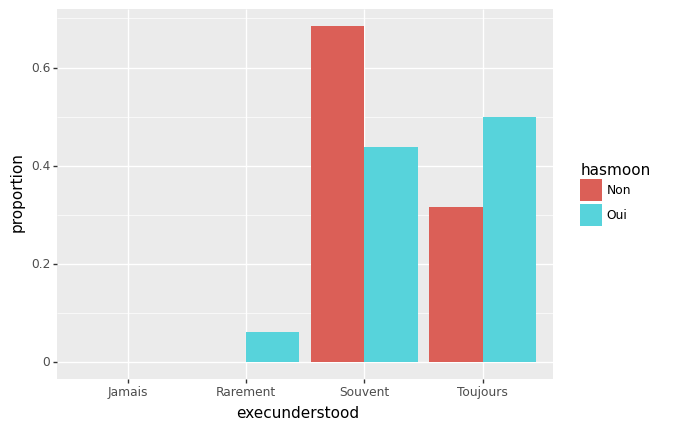

<ggplot: (324338929)>

In [8]:
data['execunderstood'] = pd.Categorical(data['execunderstood'] , categories=['Jamais', 'Rarement', 'Souvent', 'Toujours'])
data_order = data.groupby('hasmoon', as_index = False)['execunderstood'].value_counts(normalize=True)
p = (pn.ggplot(data_order) + pn.geom_bar(pn.aes(x='execunderstood', y='proportion', fill='hasmoon'), stat='identity', position='dodge') )
p

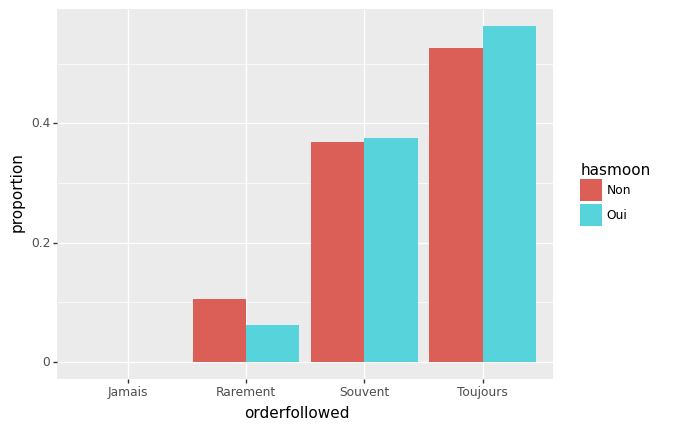

<ggplot: (324365913)>

In [9]:
data['orderfollowed'] = pd.Categorical(data['orderfollowed'] , categories=['Jamais', 'Rarement', 'Souvent', 'Toujours'])
data_order = data.groupby('hasmoon', as_index = False)['orderfollowed'].value_counts(normalize=True)
p = (pn.ggplot(data_order) + pn.geom_bar(pn.aes(x='orderfollowed', y='proportion', fill='hasmoon'), stat='identity', position='dodge') )
p

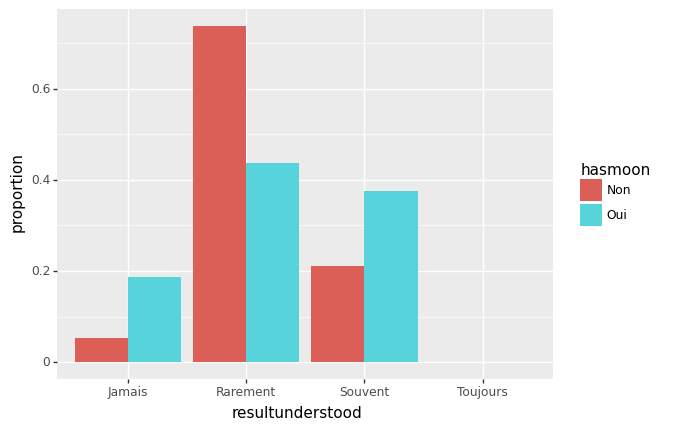

<ggplot: (324412041)>

In [10]:
data['resultunderstood'] = pd.Categorical(data['resultunderstood'] , categories=['Jamais', 'Rarement', 'Souvent', 'Toujours'])
data_order = data.groupby('hasmoon', as_index = False)['resultunderstood'].value_counts(normalize=True)
p = (pn.ggplot(data_order) + pn.geom_bar(pn.aes(x='resultunderstood', y='proportion', fill='hasmoon'), stat='identity', position='dodge') )
p

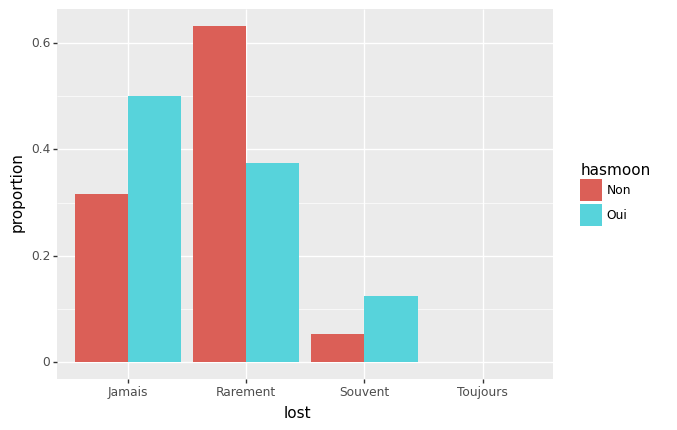

<ggplot: (324443265)>

In [11]:
data['lost'] = pd.Categorical(data.lost, categories=['Jamais', 'Rarement', 'Souvent', 'Toujours'])
data_order = data.groupby('hasmoon', as_index = False)['lost'].value_counts(normalize=True)
p = pn.ggplot(data_order) + pn.geom_bar(pn.aes(x='lost', y='proportion', fill='hasmoon'), stat='identity', position='dodge')
p

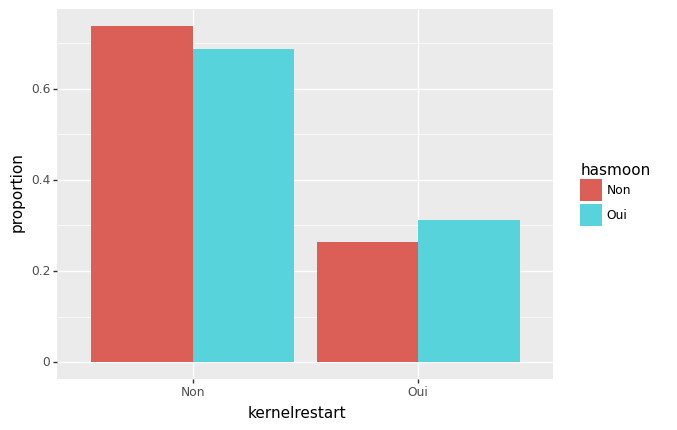

<ggplot: (324479929)>

In [12]:
data['kernelrestart'] = pd.Categorical(data.kernelrestart, categories=['Non', 'Oui'])
data_order = data.groupby('hasmoon', as_index = False)['kernelrestart'].value_counts(normalize=True)
p = pn.ggplot(data_order) + pn.geom_bar(pn.aes(x='kernelrestart', y='proportion', fill='hasmoon'), stat='identity', position='dodge')
p

/Users/falleri/.pyenv/versions/3.11.2/lib/python3.11/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 5 x 5 in image.
/Users/falleri/.pyenv/versions/3.11.2/lib/python3.11/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../colorunderstood.png


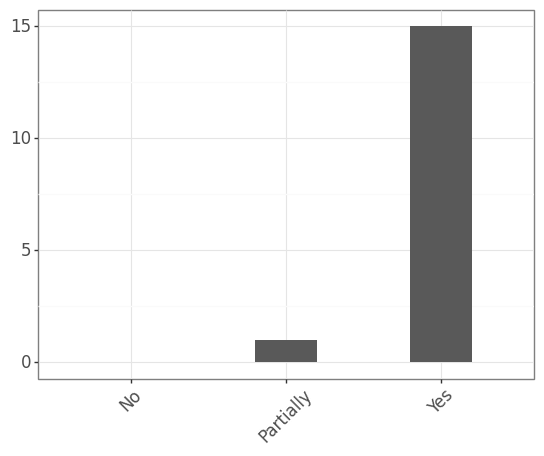

<ggplot: (325289213)>

In [47]:
# Avez-vous compris facilement le code couleur utilisé par moon ?
colorunderstoods_cat = pd.Categorical(group_with_moon['colorunderstood'], categories=['Non', 'Partiellement', 'Oui']).rename_categories(['No', 'Partially', 'Yes'])
colorunderstoods = pd.DataFrame({'colorunderstood': colorunderstoods_cat})
p = pn.ggplot(data=colorunderstoods, mapping=pn.aes(x= 'colorunderstood')) + pn.geom_bar(width=0.4) + pn.xlab('') + pn.scale_x_discrete(drop=False) + pn.theme_bw() + pn.theme(axis_title_y=pn.element_text(size=12),axis_text_y=pn.element_text(size=12) ,axis_text_x=pn.element_text(size=12, angle=45)) + pn.ylab('')
p.save(filename = '../colorunderstood.png', height=5, width=5, units = 'in')
p

/Users/falleri/.pyenv/versions/3.11.2/lib/python3.11/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 5 x 5 in image.
/Users/falleri/.pyenv/versions/3.11.2/lib/python3.11/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../moonorder.png


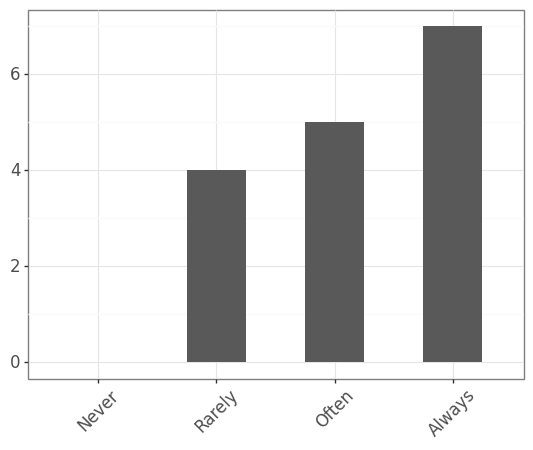

<ggplot: (325272629)>

In [44]:
# Avez-vous le sentiment que moon vous a aidé à mieux suivre l'ordre des cellules du TP ?
moonorders_cat = pd.Categorical(group_with_moon['moonorder'], categories=['Jamais', 'Rarement', 'Souvent', 'Toujours']).rename_categories(['Never', 'Rarely', 'Often', 'Always'])
moonorders = pd.DataFrame({'moonorder': moonorders_cat})
p = pn.ggplot(data=moonorders, mapping=pn.aes(x= 'moonorder')) + pn.geom_bar(width=0.5) + pn.xlab('') + pn.scale_x_discrete(drop=False) + pn.theme_bw() + pn.theme(axis_title_y=pn.element_text(size=12),axis_text_y=pn.element_text(size=12) ,axis_text_x=pn.element_text(size=12, angle=45)) + pn.ylab('')
p.save(filename = '../moonorder.png', height=5, width=5, units = 'in')
p

/Users/falleri/.pyenv/versions/3.11.2/lib/python3.11/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 5 x 5 in image.
/Users/falleri/.pyenv/versions/3.11.2/lib/python3.11/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../moonwayback.png


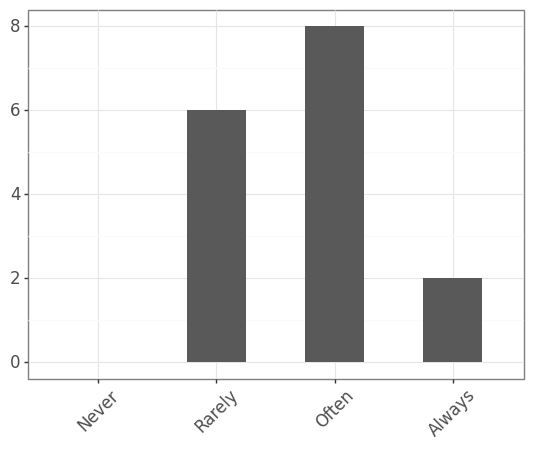

<ggplot: (325109701)>

In [43]:
# Avez vous eu le sentiment que MOON vous a aidé à retrouver une action valide quand vous étiez perdu ?
waybacks_cat = pd.Categorical(group_with_moon['moonwayback'], categories=['Jamais', 'Rarement', 'Souvent', 'Toujours']).rename_categories(['Never', 'Rarely', 'Often', 'Always'])
waybacks = pd.DataFrame({'moonwayback': waybacks_cat})
p = pn.ggplot(data=waybacks, mapping=pn.aes(x= 'moonwayback')) + pn.geom_bar(width=0.5) + pn.xlab('') + pn.scale_x_discrete(drop=False) + pn.theme_bw() + pn.theme(axis_title_y=pn.element_text(size=12),axis_text_y=pn.element_text(size=12) ,axis_text_x=pn.element_text(size=12, angle=45)) + pn.ylab('')
p.save(filename = '../moonwayback.png', height=5, width=5, units = 'in')
p

/Users/falleri/.pyenv/versions/3.11.2/lib/python3.11/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 5 x 5 in image.
/Users/falleri/.pyenv/versions/3.11.2/lib/python3.11/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../moonopinion.png


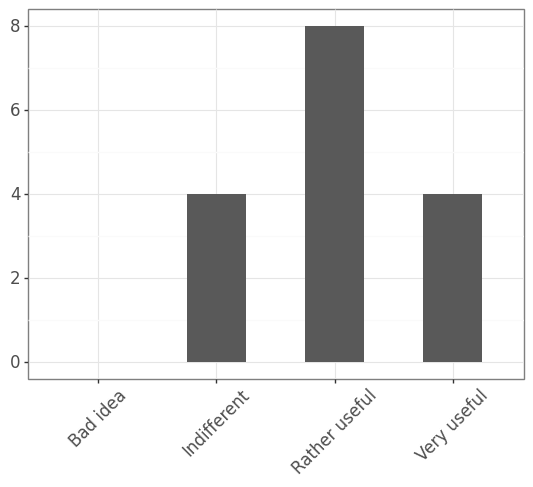

<ggplot: (325248109)>

In [41]:
# Pensez vous qu'il serait pertinent d'activer MOON par défault pour tous les TP ?
opinions_cat = pd.Categorical(group_with_moon['moonopinion'], categories=['Mauvaise idée', 'Indifférent', 'Plutôt utile', 'Très utile']).rename_categories(['Bad idea', 'Indifferent', 'Rather useful', 'Very useful'])
opinions = pd.DataFrame({'moonopinion': opinions_cat})
p = pn.ggplot(data=opinions, mapping=pn.aes(x= 'moonopinion')) + pn.geom_bar(width=0.5) + pn.xlab('') + pn.scale_x_discrete(drop=False) + pn.ylab('') + pn.theme_bw() + pn.theme(axis_title_y=pn.element_text(size=12),axis_text_y=pn.element_text(size=12) ,axis_text_x=pn.element_text(size=12, angle=45))
p.save(filename = '../moonopinion.png', height=5, width=5, units = 'in')
p

/Users/falleri/.pyenv/versions/3.11.2/lib/python3.11/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 5 x 5 in image.
/Users/falleri/.pyenv/versions/3.11.2/lib/python3.11/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../moonspeed.png


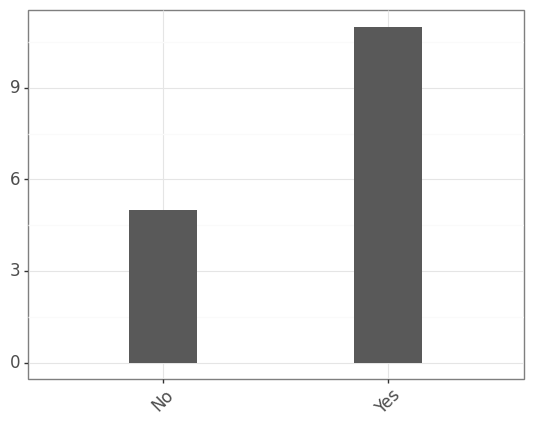

<ggplot: (324738073)>

In [45]:
# Avez vous eu le sentiment que MOON vous a aidé à progresser plus vite dans le TP ?
speeds_cat = pd.Categorical(group_with_moon['moonspeed'], categories=['Non', 'Oui']).rename_categories(['No', 'Yes'])
speeds = pd.DataFrame({'moonspeed': speeds_cat})
p = pn.ggplot(data=speeds, mapping=pn.aes(x= 'moonspeed')) + pn.geom_bar(width=0.3) + pn.xlab('') + pn.ylab('') + pn.theme_bw() + pn.theme(axis_title_y=pn.element_text(size=12),axis_text_y=pn.element_text(size=12) ,axis_text_x=pn.element_text(size=12, angle=45))
p.save(filename = '../moonspeed.png', height=5, width=5, units = 'in')
p

/Users/falleri/.pyenv/versions/3.11.2/lib/python3.11/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 5 x 5 in image.
/Users/falleri/.pyenv/versions/3.11.2/lib/python3.11/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../moonactions.png


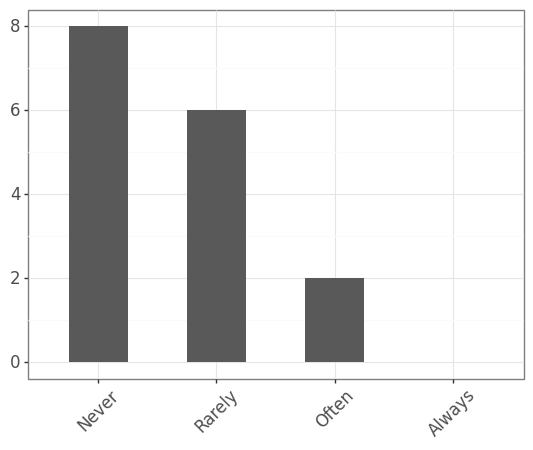

<ggplot: (325273221)>

In [39]:
# Avez vous eu le sentiment d'être surpris par les actions sugérées par MOON ?
moonactions_cat = pd.Categorical(group_with_moon['moonactions'], categories=['Jamais', 'Rarement', 'Souvent', 'Toujours']).rename_categories(['Never', 'Rarely', 'Often', 'Always'])
moonactions = pd.DataFrame({'moonactions': moonactions_cat})
p = pn.ggplot(data=moonactions, mapping=pn.aes(x= 'moonactions')) + pn.geom_bar(width=0.5) + pn.xlab('') + pn.scale_x_discrete(drop=False) + pn.ylab('') + pn.theme_bw() + pn.theme(axis_title_y=pn.element_text(size=12),axis_text_y=pn.element_text(size=12) ,axis_text_x=pn.element_text(size=12, angle=45))
p.save(filename = '../moonactions.png', height=5, width=5, units = 'in')
p

In [19]:
group_with_moon['moonactionmore'].dropna().value_counts()

Par exemple, un moment j'ai fais une erreur à un endroit dans une case, la tâche à accomplir a était compter comme bien effectuée. Mais plutard en voulant revenir en arrière, MOON m'a indiqué que sur cette case il y avait une erreur. J'étais surpris.                                                                        1
Lorsque le résultat d'une cellule "test" affiche une erreur de code faite trois cases plus haut, nous modifions celle-ci afin de la corriger. Nous validons la case et nous sommes obligés de revalider les deux cases intermédiaires avant de pouvoir refaire le test, même si celles-ci n'ont pas été modifiées pour autant.    1
Je sais que j'ai déjà modifié du code selon les directives de MOON alors que ça me paraissait pas nécessaire.\nJe me suis parfois étonné de voir des chemins proposés qui ne me paraissaient pas intuitifs, en sautant plusieurs cellules par exemple.\nMais ça ne m'a pas dérangé et le notebook s'est très bien rempli.         1
Devoir exécuter des cellules

In [20]:
group_with_moon['moonfree'].dropna().value_counts()

Quand on utilise MOON pour faire un notebook, cela apporte un certain confort que l'on ne remarque pas. Mais dès que l'on ne l'utilise pas en refaisant le notebook sur lequel on l'avait utilisé. La différence se fait sentir et le notebook paraît bien moins "claire".    1
C'est assez fastidieux de réexécuter manuellement toutes les cellules vertes quand on a fait une modification sur une fonction très antérieure.\nMais c'est un mal pour un bien car le temps gagné est sans doute supérieur à celui perdu à chercher dans le notebook.        1
Peut être faire scroll / placer le curseur automatiquement jusqu'à la cellule à modifier, du moins lorsque celle-ci est hors écran / éloigné car parfois il faut deviner que la cellule était au début du notebook alors qu'on vient d'en exécuter une à la fin.              1
Name: moonfree, dtype: int64